In [75]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
data_directory_path = Path('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters')
image_paths_list = sorted(data_directory_path.glob('*.tif'))
number_of_tifs = len(image_paths_list)
print(f'{number_of_tifs} broken *.tif')

329 broken *.tif


In [3]:
# first thing I'll do is open each image in PIL then save it back out as a *.tif
output_directory_path = data_directory_path.joinpath('output')
output_directory_path.mkdir(exist_ok=True)

if output_directory_path.is_dir():
    print(output_directory_path)

/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/output


In [10]:
# already ran
# super basic, just open and save to an output directory with PIL

broken_images_paths_list = []
working_images_paths_list = []

for image_path in image_paths_list:
    
    output_path = output_directory_path.joinpath(image_path.name)
    
    try:
        image = Image.open(image_path)
        image.save(output_path, dpi=image.info['dpi'])
        if image_path not in working_images_paths_list:
            working_images_paths_list.append(image_path)
    except OSError:  # breaks if the image can't open
        if image_path not in broken_images_paths_list:
            broken_images_paths_list.append(image_path)
            
number_of_broken_images = len(broken_images_paths_list)
number_of_working_images = len(working_images_paths_list)

print(f'{number_of_broken_images} broken images')
print(f'{number_of_working_images} working images')

52 of broken images
277 of working images


In [7]:
image_paths_list[0]

PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/arm03020001001.tif')

In [10]:
!open {str(output_directory_path)}

In [16]:
# get broken and working image lists

# get list of working images: images that PIL could open & save
working_images_paths_list = sorted(output_directory_path.glob('*.tif'))

# create broken images list from all images list, but skip those in working list
# have to add output directory into middle of path to compare with working list
broken_images_paths_list = sorted([x for x in image_paths_list if x.parents[0].joinpath('output', x.name) not in working_images_paths_list])

print(f'{len(broken_images_paths_list)} broken images')
print(f'{len(working_images_paths_list)} working images')

52 broken images
277 working images


In [17]:
broken_images_paths_list[:3]

[PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/arm03020001002.tif'),
 PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/arm03020001004.tif'),
 PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/arm03020001005.tif')]

In [18]:
working_images_paths_list[:3]

[PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/output/arm03020001001.tif'),
 PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/output/arm03020001003.tif'),
 PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/output/arm03020001006.tif')]

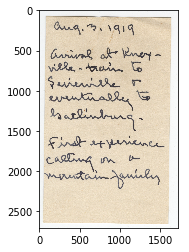

In [64]:
# open 1st working image (since the broken images don't open at all we'll handle those later)
image_path = working_images_paths_list[0]
image = Image.open(image_path)

plt.imshow(image)

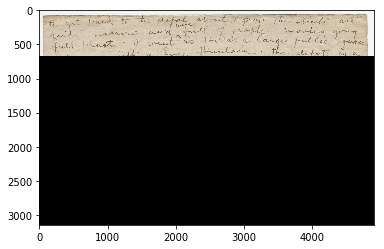

In [65]:
# open 2nd image as the 1st doesn't appear to have any issues at first glance
image_path = working_images_paths_list[1]
image = Image.open(image_path)

plt.imshow(image)

In [126]:
# convert image to numpy array to check data
# https://kite.com/python/examples/4887/pil-convert-between-a-pil-%60image%60-and-a-numpy-%60array%60
np_image = np.array(image)

np_image

array([[[242, 244, 247],
        [240, 240, 244],
        [240, 241, 244],
        ...,
        [245, 247, 248],
        [248, 249, 249],
        [249, 249, 251]],

       [[242, 244, 245],
        [240, 244, 245],
        [241, 244, 246],
        ...,
        [245, 248, 249],
        [247, 250, 252],
        [248, 250, 250]],

       [[242, 245, 246],
        [240, 243, 246],
        [240, 242, 243],
        ...,
        [246, 248, 249],
        [247, 248, 250],
        [246, 248, 248]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [127]:
# compare numpy share & PIL size
print(f'image: {image_path}')
print(f'numpy shape (height, width, channels): {np_image.shape}')  # height, width
print(f'PIL size (width, height): {image.size}')  # width, height

image: /Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/output/arm03020001003.tif
numpy shape (height, width, channels): (3146, 4912, 3)
PIL size (width, height): (4912, 3146)


In [128]:
height, width, number_of_channels = np_image.shape
print(f'height: {height}')
print(f'width: {width}')
print(f'number_of_channels: {number_of_channels}')

height: 3146
width: 4912
number_of_channels: 3


In [129]:
# split channels
# https://stackoverflow.com/a/41501006

def channelSplit(np_image):
    
    return np.dsplit(np_image, np_image.shape[-1])

np_image_r, np_image_g, np_image_b = channelSplit(np_image)

np_image_g

array([[[244],
        [240],
        [241],
        ...,
        [247],
        [249],
        [249]],

       [[244],
        [244],
        [244],
        ...,
        [248],
        [250],
        [250]],

       [[245],
        [243],
        [242],
        ...,
        [248],
        [248],
        [248]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=uint8)

(array([1.2160695e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 2.0000000e+00, 7.0000000e

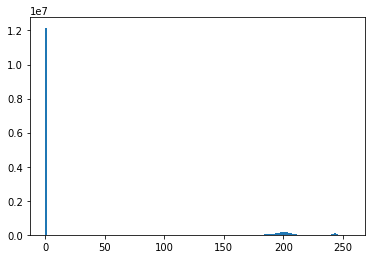

In [130]:
# get histogram of green channel
# https://matplotlib.org/users/image_tutorial.html
plt.hist(np_image_g.ravel(), bins=256, range=(0, 256))

(array([1.2160695e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 2.0000000e+00, 7.0000000e

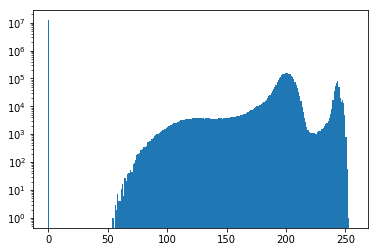

In [136]:
# plot histogram with logarithmic scale
plt.hist(np_image_g.ravel(), bins=256, range=(0, 256), log=True)

In [122]:
# set all 0, 0, 0 black pixels as pure red
# https://stackoverflow.com/a/47366421

#find the only zeros pixels with the mask 
#(of course any other color combination would work just as well)
#... and apply "all" along the color axis
mask = (np_image == [0.,0.,0.]).all(axis=2)

#apply the mask to overwrite the pixels
np_image[ mask ] = [255,0,0]
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

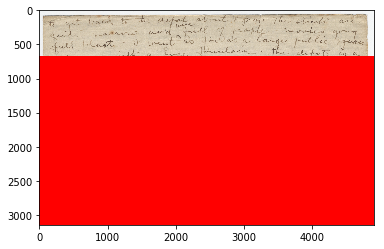

In [124]:
plt.imshow(np_image)

In [164]:
# can access binary->hex in Python with the following
# https://stackoverflow.com/questions/3964245/convert-file-to-hex-string-python

# in this case, though, it's faster to just use ExifTool

In [141]:
# broken images are just filled with binary zeros according to exiftool
response = !exiftool {str(broken_images_paths_list[0])}
response

['ExifTool Version Number         : 11.26',
 'File Name                       : arm03020001002.tif',
 'Directory                       : /Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters',
 'File Size                       : 44 MB',
 'File Modification Date/Time     : 2011:08:29 11:22:29-04:00',
 'File Access Date/Time           : 2019:07:19 10:20:09-04:00',
 'File Inode Change Date/Time     : 2019:07:19 10:11:07-04:00',
 'File Permissions                : rw-r--r--',
 'Error                           : Entire file is binary zeros']

In [142]:
# get last response to check for error
print(response[-1])

Error                           : Entire file is binary zeros


In [147]:
# create filenames list of "images" that only contain binary zeros

binary_zero_filename_list = []

# loop through all broken images and see how many are binary zeros
for broken_image_path in broken_images_paths_list:
    error_check = !exiftool {str(broken_image_path)}
    
    # compare last line of error check to reponse from above
    if error_check[-1] == response[-1]:
        binary_zero_filename_list.append(broken_image_path.name)
        
print(f'{len(broken_images_paths_list)} broken images')
print(f'{len(binary_zero_filename_list)} images containing only binary zeros')

52 broken images
51 images containing only binary zeros


In [148]:
broken_images_not_binary_zeros_paths_list = [x for x in broken_images_paths_list if x.name not in binary_zero_filename_list]

broken_images_not_binary_zeros_paths_list

[PosixPath('/Users/jeremy/Documents/GitHub/utk_Arrowmont/data/Ruth_Sturley_Letters/arm03020003007.tif')]

In [162]:
filenames_textfile_path = Path('data/filenames.txt')
for filename in binary_zero_filename_list:
    !echo {filename} >> {str(filenames_textfile_path)}
!open {str(filenames_textfile_path)}
!open {str(filenames_textfile_path.parents[0])}

In [161]:
!rm {str(filenames_textfile_path)}